<a href="https://colab.research.google.com/github/Hoahot/HoangDucHoa19146185/blob/main/Fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 80 images belonging to 8 classes.
Found 26 images belonging to 8 classes.
Epoch 1/5
3/3 [==============================] - 43s 16s/step - loss: 189.9281 - accuracy: 0.1000 - val_loss: 91.6687 - val_accuracy: 0.1154
Epoch 2/5
3/3 [==============================] - 26s 10s/step - loss: 89.5711 - accuracy: 0.1000 - val_loss: 45.1955 - val_accuracy: 0.1154
Epoch 3/5
3/3 [==============================] - 26s 8s/step - loss: 41.5579 - accuracy: 0.2000 - val_loss: 10.9112 - val_accuracy: 0.1154
Epoch 4/5
3/3 [==============================] - 24s 7s/step - loss: 15.4601 - accuracy: 0.1125 - val_loss: 5.7226 - val_accuracy: 0.0769
Epoch 5/5
3/3 [==============================] - 24s 7s/step - loss: 6.3089 - accuracy: 0.1375 - val_loss: 2.0974 - val_accuracy: 0.2308


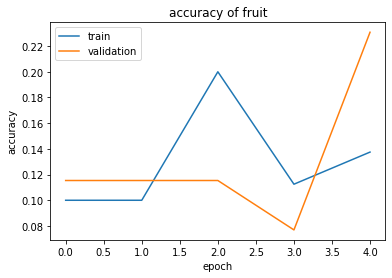

In [4]:
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.layers import Dense,Flatten, Dropout
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
train_path = '/content/drive/MyDrive/Fruit/'
train = ImageDataGenerator(rescale = 1./255,
                           width_shift_range=0.2,
                           rotation_range=40,
                           shear_range=0.2,
                           height_shift_range=0.2,
                           zoom_range=0.2,
                           fill_mode='nearest',
                           horizontal_flip=True)
validation = ImageDataGenerator(rescale = 1./255)

train_data = train.flow_from_directory('/content/drive/MyDrive/Fruit/Train/',
                                       target_size = (700,300),
                                       class_mode = 'categorical')
validation_dataset = train.flow_from_directory('/content/drive/MyDrive/Fruit/Test/',
                                       target_size = (700,300),
                                       class_mode = 'categorical')
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(700,300,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_data,epochs=5,batch_size=128,validation_data=validation_dataset,verbose=1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of fruit')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [1]:
drive.mount('/content/drive')

Mounted at /content/drive
